# Neural Network exam {-}

This assignment aims at familiarizing you with training and testing a Deep Neural Network (DNN). Here are th requirements of the assignment:

- Load the data.
- Process and normalize the images.
- Build, train and test a model that has at most 4M (four millions) parameters (use model.summary() to check). The model must be built FROM SCRATCH and its architecture is of your choice.
- Evaluate the model performance on the test set.

The dataset you will be working on is cifar10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)

### Submission {-}
Coding environement:
- Google Colab: https://colab.research.google.com/
- Framework: Tensorflow

The structure of submission folder should be organized as follows:

- ./\<StudentID>-<StudentName>-<Test-accuracy>.ipynb: Jupyter notebook containing source code. For example, if your studentID is 20C12345, your name is Nguyen Van A, and you get 0.8124 accuracy on the test set, the name of this file is 20C12345-Nguyen-Van-A-08124.ipynb.

### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. In addition, your code should conform to a Python coding convention such as PEP-8. The grading schema is as follows:
- Top 5 test test accuracy: 10 points.
- Top 6-10 test accuray: 9 points.
- Top 11-20 test accuracy: 8 points.
- Top 21-last test accuracy: 7 points.
- Do not meet the assignment requirements (model having at most 4M parameters and built from scratch): 4 points.
- Plagiarism: 0 point.
- Do not submit: 0 point.

### Deadline {-}
- Deadline: 15/09/2023
- Submission link: https://docs.google.com/forms/d/18Arc4XRlH7qArurvELE4pzlKYS7IZfqoy1oxKuPcqa0


In [ ]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow

In [ ]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


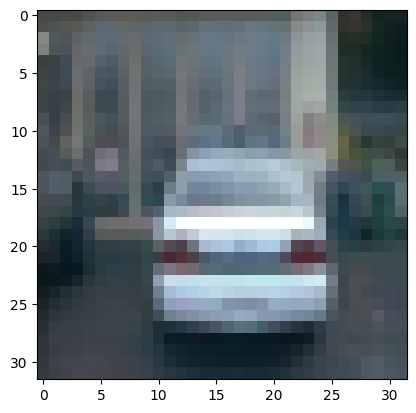

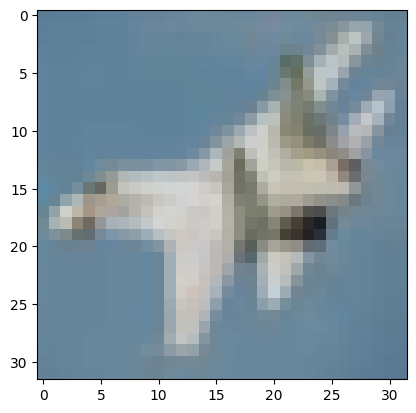

In [ ]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

In [ ]:
# Your code goes here
# Preprocess data
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, Conv2D, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD

## The model
The model is customized to work well on Cirfar10
The model is based on MobileNet-v2. The model in this project includes some architectures and other modifications,.... using Tensorflow and functional API as well as some regularization and different kernel sizes...

In [ ]:
#Input layer
input_layer = tf.keras.layers.Input(shape=(32, 32, 3), name="input_layer")

# Convolutional Layer 1
x1 = tf.keras.layers.Conv2D(64, (3, 3), padding="same", name="x1", kernel_initializer='he_uniform')(input_layer)
x2 = tf.keras.layers.BatchNormalization(name="x2")(x1)
x3 = tf.keras.layers.ReLU(name="x3")(x2)

# Depthwise Convolution Layer
x4 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x4")(x3)
x5 = tf.keras.layers.BatchNormalization(name="x5")(x4)
x6 = tf.keras.layers.ReLU(name="x6")(x5)

# Convolutional Projection Layer
x7 = tf.keras.layers.Conv2D(32, (1, 1), padding="same", name="x7", kernel_initializer='he_uniform')(x6)
x8 = tf.keras.layers.BatchNormalization(name="x8")(x7)
x9 = Dropout(0.15)(x8)

# Block 1 - Expand Layer
x10 = tf.keras.layers.Conv2D(96, (3, 3), padding="same", name="x10")(x9)#(96, (1, 1)
x11 = tf.keras.layers.BatchNormalization(name="x11")(x10)
x12 = tf.keras.layers.ReLU(name="x13")(x11)
x13 = Dropout(0.15)(x12)

# Zero Padding Layer
x14 = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)), name="x14")(x13)

# Depthwise Convolution Layer
x15 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="valid", strides=(2, 2), name="x15")(x14)
x15 = tf.keras.layers.BatchNormalization(name="x15_batch")(x15)
x16 = tf.keras.layers.ReLU(name="x17")(x15)
x17 = Dropout(0.15)(x16)
# Project Layer
x18 = tf.keras.layers.Conv2D(24, (1, 1), padding="same", name="x18")(x17)
x19 = tf.keras.layers.BatchNormalization(name="x19")(x18)

#BLOCK 2
# Block 2 - Expand Layer
x20 = tf.keras.layers.Conv2D(150, (1, 1), padding="same", name="x20", kernel_initializer='he_uniform')(x19)
x21 = tf.keras.layers.BatchNormalization(name="x21")(x20)
x22 = tf.keras.layers.ReLU(name="x22")(x21)
x22 = Dropout(0.15)(x22)

# Depthwise Convolution Layer
x23 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x23")(x22)
x24 = tf.keras.layers.BatchNormalization(name="x24")(x23)
x25 = tf.keras.layers.ReLU(name="x26")(x24)
x26 = Dropout(0.15)(x25)

# Project Layer
x27 = tf.keras.layers.Conv2D(24, (1, 1), padding="same", name="x27")(x26)
x28 = tf.keras.layers.BatchNormalization(name="x28")(x27)

# Add Layer
x29 = tf.keras.layers.Add(name="x29")([x19, x28])

# Block 3 - Expand Layer
x30 = tf.keras.layers.Conv2D(150, (1, 1), padding="same", name="x30", kernel_initializer='he_uniform')(x29)
x31 = tf.keras.layers.BatchNormalization(name="x31")(x30)
x32 = tf.keras.layers.ReLU(name="x33")(x31)
x33 = Dropout(0.15)(x32)
# Zero Padding Layer
x34 = tf.keras.layers.ZeroPadding2D(padding=(1, 1), name="x34")(x33)

# Depthwise Convolution Layer
x35 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="valid", strides=(2, 2), name="x35")(x34)
x36 = tf.keras.layers.BatchNormalization(name="x36")(x35)
x37 = tf.keras.layers.ReLU(name="x38")(x36)
x38 = Dropout(0.15)(x37)
# Project Layer
x39 = tf.keras.layers.Conv2D(64, (1, 1), padding="same", name="x39")(x38)#Conv2D(32, (1, 1)
x40 = tf.keras.layers.BatchNormalization(name="x40")(x39)

# Block 4 - Expand Layer
x41 = tf.keras.layers.Conv2D(200, (1, 1), padding="same", name="x41", kernel_initializer='he_uniform')(x40)
x42 = tf.keras.layers.BatchNormalization(name="x42")(x41)
x43 = tf.keras.layers.ReLU(name="x44")(x42)
x44 = Dropout(0.15)(x43)

# Depthwise Convolution Layer
x45 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x45")(x44)
x46 = tf.keras.layers.BatchNormalization(name="x46")(x45)
x47 = tf.keras.layers.ReLU(name="x48")(x46)
x48 = Dropout(0.15)(x47)

# Project Layer
x49 = tf.keras.layers.Conv2D(64, (1, 1), padding="same", name="x49", kernel_initializer='he_uniform')(x48)#
x50 = tf.keras.layers.BatchNormalization(name="x50")(x49)

# Add Layer
x51 = tf.keras.layers.Add(name="x51")([x40, x50])

# Block 5 - Expand Layer
x52 = tf.keras.layers.Conv2D(200, (1, 1), padding="same", name="x52", kernel_initializer='he_uniform')(x51)
x53 = tf.keras.layers.BatchNormalization(name="x53")(x52)
x54 = tf.keras.layers.ReLU(name="x55")(x53)
x55 = Dropout(0.15)(x54)

# Depthwise Convolution Layer
x56 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x56")(x55)
x57 = tf.keras.layers.BatchNormalization(name="x57")(x56)
x58 = tf.keras.layers.ReLU(name="x59")(x57)
x59 = Dropout(0.15)(x58)

# Project Layer
x60 = tf.keras.layers.Conv2D(64, (1, 1), padding="same", name="x60", kernel_initializer='he_uniform')(x59)
x61 = tf.keras.layers.BatchNormalization(name="x61")(x60)

# Add Layer
x62 = tf.keras.layers.Add(name="x62")([x51, x61])

# Block 6 - Expand Layer
x63 = tf.keras.layers.Conv2D(200, (1, 1), padding="same", name="x63", kernel_initializer='he_uniform')(x62)
x64 = tf.keras.layers.BatchNormalization(name="x64")(x63)
x65 = tf.keras.layers.ReLU(name="x66")(x64)
x66 = Dropout(0.15)(x65)
# Zero Padding Layer
x67 = tf.keras.layers.ZeroPadding2D(padding=(1, 1), name="x67")(x66)

# Depthwise Convolution Layer
x68 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="valid", strides=(2, 2), name="x68")(x67)
x69 = tf.keras.layers.BatchNormalization(name="x69")(x68)
x70 = tf.keras.layers.ReLU(name="x71")(x69)
x71 = Dropout(0.15)(x70)

# Project Layer
x72 = tf.keras.layers.Conv2D(64, (1, 1), padding="same", name="x72")(x71)
x73 = tf.keras.layers.BatchNormalization(name="x73")(x72)

# Block 7 - Expand Layer
x74 = tf.keras.layers.Conv2D(400, (1, 1), padding="same", name="x74", kernel_initializer='he_uniform')(x73)
x75 = tf.keras.layers.BatchNormalization(name="x75")(x74)
x76 = tf.keras.layers.ReLU(name="x77")(x75)
x77 = Dropout(0.15)(x76)

# Depthwise Convolution Layer
x78 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x78")(x77)
x79 = tf.keras.layers.BatchNormalization(name="x79")(x78)
x80 = tf.keras.layers.ReLU(name="x81")(x79)
x81 = Dropout(0.15)(x80)
# Project Layer
x82 = tf.keras.layers.Conv2D(64, (1, 1), padding="same", name="x82")(x81)
x83 = tf.keras.layers.BatchNormalization(name="x83")(x82)

# Add Layer
x84 = tf.keras.layers.Add(name="x84")([x73, x83])

# Block 8 - Expand Layer
x85 = tf.keras.layers.Conv2D(400, (1, 1), padding="same", name="x85", kernel_initializer='he_uniform')(x84)
x86 = tf.keras.layers.BatchNormalization(name="x86")(x85)
x87 = tf.keras.layers.ReLU(name="x88")(x86)
x88 = Dropout(0.15)(x87)

# Depthwise Convolution Layer
x89 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x89")(x88)
x90 = tf.keras.layers.BatchNormalization(name="x90")(x89)
x91 = tf.keras.layers.ReLU(name="x92")(x90)
x92 = Dropout(0.15)(x91)

# Project Layer
x93 = tf.keras.layers.Conv2D(64, (1, 1), padding="same", name="x93", kernel_initializer='he_uniform')(x92)
x94 = tf.keras.layers.BatchNormalization(name="x94")(x93)

# Add Layer
x95 = tf.keras.layers.Add(name="x95")([x84, x94])

# Block 9 - Expand Layer
x96 = tf.keras.layers.Conv2D(384, (1, 1), padding="same", name="x96", kernel_initializer='he_uniform')(x95)
x97 = tf.keras.layers.BatchNormalization(name="x97")(x96)
x98 = tf.keras.layers.ReLU(name="x99")(x97)
x99 = Dropout(0.15)(x98)

# Depthwise Convolution Layer
x100 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x100")(x99)
x101 = tf.keras.layers.BatchNormalization(name="x101")(x100)
x102 = tf.keras.layers.ReLU(name="x103")(x101)
x103 = Dropout(0.15)(x102)

# Project Layer
x104 = tf.keras.layers.Conv2D(64, (1, 1), padding="same", name="x104", kernel_initializer='he_uniform')(x103)
x105 = tf.keras.layers.BatchNormalization(name="x105")(x104)

# Add Layer
x106 = tf.keras.layers.Add(name="x106")([x95, x105])

# Block 10 - Expand Layer
x107 = tf.keras.layers.Conv2D(384, (1, 1), padding="same", name="x107", kernel_initializer='he_uniform')(x106)
x108 = tf.keras.layers.BatchNormalization(name="x108")(x107)
x109 = tf.keras.layers.ReLU(name="x110")(x108)
x110 = Dropout(0.15)(x109)

# Depthwise Convolution Layer
x111 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x111")(x110)
x112 = tf.keras.layers.BatchNormalization(name="x112")(x111)
x113 = tf.keras.layers.ReLU(name="x114")(x112)
x114 = Dropout(0.2)(x113)

# Project Layer
x115 = tf.keras.layers.Conv2D(96, (1, 1), padding="same", name="x115", kernel_initializer='he_uniform')(x114)
x116 = tf.keras.layers.BatchNormalization(name="x116")(x115)

# Block 11 - Expand Layer
x117 = tf.keras.layers.Conv2D(576, (1, 1), padding="same", name="x117", kernel_initializer='he_uniform')(x116)
x118 = tf.keras.layers.BatchNormalization(name="x118")(x117)
x119 = tf.keras.layers.ReLU(name="x120")(x118)
x120 = Dropout(0.15)(x119)

# Depthwise Convolution Layer
x121 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x121")(x120)
x122 = tf.keras.layers.BatchNormalization(name="x122")(x121)
x123 = tf.keras.layers.ReLU(name="x124")(x122)
x124 = Dropout(0.15)(x123)

# Project Layer
x125 = tf.keras.layers.Conv2D(96, (1, 1), padding="same", name="x125", kernel_initializer='he_uniform')(x124)
x126 = tf.keras.layers.BatchNormalization(name="x126")(x125)

# Add Layer
x127 = tf.keras.layers.Add(name="x127")([x116, x126])

# Block 12 - Expand Layer
x128 = tf.keras.layers.Conv2D(576, (1, 1), padding="same", name="x128", kernel_regularizer=regularizers.l2(0.01), kernel_initializer='he_uniform')(x127)
x129 = tf.keras.layers.BatchNormalization(name="x129")(x128)
x130 = tf.keras.layers.ReLU(name="x131")(x129)
x131 = Dropout(0.15)(x130)

# Depthwise Convolution Layer
x132 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x132")(x131)
x133 = tf.keras.layers.BatchNormalization(name="x133")(x132)
x134 = tf.keras.layers.ReLU(name="x135")(x133)
x135 = Dropout(0.15)(x134)

# Project Layer
x136 = tf.keras.layers.Conv2D(96, (1, 1), padding="same", name="x136", kernel_regularizer=regularizers.l2(0.01), kernel_initializer='he_uniform')(x135)
x137 = tf.keras.layers.BatchNormalization(name="x137")(x136)

# Add Layer
x138 = tf.keras.layers.Add(name="x138")([x127, x137])

###################################################################
# Block 12' - Expand Layer
x128 = tf.keras.layers.Conv2D(576, (1, 1), padding="same", name="x128_", kernel_regularizer=regularizers.l2(0.01), kernel_initializer='he_uniform')(x138)
x129 = tf.keras.layers.BatchNormalization(name="x129_")(x128)
x130 = tf.keras.layers.ReLU(name="x131_")(x129)
x131 = Dropout(0.15)(x130)

# Depthwise Convolution Layer
x132 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x132_")(x131)
x133 = tf.keras.layers.BatchNormalization(name="x133_")(x132)
x134 = tf.keras.layers.ReLU(name="x135_")(x133)
x135 = Dropout(0.15)(x134)

# Project Layer
x136 = tf.keras.layers.Conv2D(96, (1, 1), padding="same", name="x136_", kernel_regularizer=regularizers.l2(0.01), kernel_initializer='he_uniform')(x135)
x137 = tf.keras.layers.BatchNormalization(name="x137_")(x136)

# Add Layer
x138 = tf.keras.layers.Add(name="x138_")([x127, x137])
############################################################################

# Block 13 - Expand Layer
x139 = tf.keras.layers.Conv2D(576, (1, 1), padding="same", name="x139", kernel_regularizer=regularizers.l2(0.01), kernel_initializer='he_uniform')(x138)
x140 = tf.keras.layers.BatchNormalization(name="x140")(x139)
x141 = tf.keras.layers.ReLU(name="x142")(x140)
x142 = Dropout(0.15)(x141)

# Zero Padding Layer
x143 = tf.keras.layers.ZeroPadding2D(name="x143")(x142)

# Depthwise Convolution Layer
x144 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="valid", name="x144")(x143)
x145 = tf.keras.layers.BatchNormalization(name="x145")(x144)
x146 = tf.keras.layers.ReLU(name="x147")(x145)
x147 = Dropout(0.15)(x146)

# Project Layer
x148 = tf.keras.layers.Conv2D(160, (1, 1), padding="same", name="x148", kernel_regularizer=regularizers.l2(0.01), kernel_initializer='he_uniform')(x147)
x149 = tf.keras.layers.BatchNormalization(name="x149")(x148)

# Block 14 - Expand Layer
x150 = tf.keras.layers.Conv2D(960, (1, 1), padding="same", name="x150")(x149)
x151 = tf.keras.layers.BatchNormalization(name="x151")(x150)
x152 = tf.keras.layers.ReLU(name="x153")(x151)
x153 = Dropout(0.15)(x152)

# Depthwise Convolution Layer
x154 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x154")(x153)
x155 = tf.keras.layers.BatchNormalization(name="x155")(x154)
x156 = tf.keras.layers.ReLU(name="x157")(x155)
x157 = Dropout(0.15)(x156)

# Project Layer
x158 = tf.keras.layers.Conv2D(160, (1, 1), padding="same", name="x158", kernel_regularizer=regularizers.l2(0.01), kernel_initializer='he_uniform')(x157)
x159 = tf.keras.layers.BatchNormalization(name="x159")(x158)

# Add Layer
x160 = tf.keras.layers.Add(name="x160")([x149, x159])

# Block 15 - Expand Layer
x161 = tf.keras.layers.Conv2D(960, (1, 1), padding="same", name="x161")(x160)
x162 = tf.keras.layers.BatchNormalization(name="x162")(x161)
x163 = tf.keras.layers.ReLU(name="x164")(x162)
x164 = Dropout(0.15)(x163)

# Depthwise Convolution Layer
x165 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x165")(x164)
x166 = tf.keras.layers.BatchNormalization(name="x166")(x165)
x167 = tf.keras.layers.ReLU(name="x168")(x166)
x168 = Dropout(0.15)(x167)

# Project Layer
x169 = tf.keras.layers.Conv2D(160, (1, 1), padding="same", name="x169", kernel_regularizer=regularizers.l2(0.01), kernel_initializer='he_uniform')(x168)
x170 = tf.keras.layers.BatchNormalization(name="x170")(x169)

# Add Layer
x171 = tf.keras.layers.Add(name="x171")([x160, x170])

# Block 16 - Expand Layer
x172 = tf.keras.layers.Conv2D(960, (1, 1), padding="same", name="x172")(x171)
x173 = tf.keras.layers.BatchNormalization(name="x173")(x172)
x174 = tf.keras.layers.ReLU(name="x175")(x173)
x175 = Dropout(0.15)(x174)

# Depthwise Convolution Layer
x176 = tf.keras.layers.DepthwiseConv2D((3, 3), padding="same", name="x176")(x175)
x177 = tf.keras.layers.BatchNormalization(name="x177")(x176)
x178 = tf.keras.layers.ReLU(name="x179")(x177)
x179 = Dropout(0.15)(x178)

# Project Layer
x180 = tf.keras.layers.Conv2D(320, (1, 1), padding="same", name="x180", kernel_regularizer=regularizers.l2(0.01), kernel_initializer='he_uniform')(x179)
x181 = tf.keras.layers.BatchNormalization(name="x181")(x180)

# Convolution Layer
x182 = tf.keras.layers.Conv2D(1280, (1, 1), padding="same", name="x182")(x181)
x183 = tf.keras.layers.BatchNormalization(name="x183")(x182)
out_put = tf.keras.layers.ReLU(name="out_put")(x183)

# Final layer
x_final = GlobalAveragePooling2D()(out_put)
x_final = Dense(128, activation='relu')(x_final)
x_final = Dense(10, activation='softmax')(x_final)
model = tf.keras.Model(input_layer, x_final, name="Model1")



In [ ]:
model.summary()

Model: "Model1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 x1 (Conv2D)                 (None, 32, 32, 64)           1792      ['input_layer[0][0]']         
                                                                                                  
 x2 (BatchNormalization)     (None, 32, 32, 64)           256       ['x1[0][0]']                  
                                                                                                  
 x3 (ReLU)                   (None, 32, 32, 64)           0         ['x2[0][0]']                  
                                                                                             

## Some helper functions

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=80, restore_best_weights=True)

# Define model checkpoint callback
model_checkpoint = ModelCheckpoint('best_model_IsaT_6.h5',
                                   monitor='val_loss',
                                   save_best_only=True,
                                   mode='min',
                                   verbose=1)

In [ ]:
# Define learning rate schedule for SGD optimizer
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True)

# Create SGD optimizer with the learning rate schedule
sgd_optimizer = SGD(learning_rate=lr_schedule, momentum=0.9)
model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer= sgd_optimizer, metrics=['accuracy'])

# Train the model.
history = model.fit(X_train, y_train, epochs=1000,batch_size = 128, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

Epoch 1/1000
352/352 [==============================] - ETA: 0s - loss: 2.5575 - accuracy: 0.4844
Epoch 1: val_loss improved from inf to 2.20006, saving model to best_model_IsaT_6.h5
352/352 [==============================] - 53s 108ms/step - loss: 2.5575 - accuracy: 0.4844 - val_loss: 2.2001 - val_accuracy: 0.4110
Epoch 2/1000
352/352 [==============================] - ETA: 0s - loss: 1.6153 - accuracy: 0.5273
Epoch 2: val_loss improved from 2.20006 to 1.83931, saving model to best_model_IsaT_6.h5
352/352 [==============================] - 37s 106ms/step - loss: 1.6153 - accuracy: 0.5273 - val_loss: 1.8393 - val_accuracy: 0.4112
Epoch 3/1000
352/352 [==============================] - ETA: 0s - loss: 1.3172 - accuracy: 0.5681
Epoch 3: val_loss improved from 1.83931 to 1.64447, saving model to best_model_IsaT_6.h5
352/352 [==============================] - 37s 106ms/step - loss: 1.3172 - accuracy: 0.5681 - val_loss: 1.6445 - val_accuracy: 0.4738
Epoch 4/1000
352/352 [===================

## Evaluate the model on the test data

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 4s 10ms/step - loss: 0.4608 - accuracy: 0.8782
Test Accuracy: 87.82%


## Plot the accuracy and loss performance

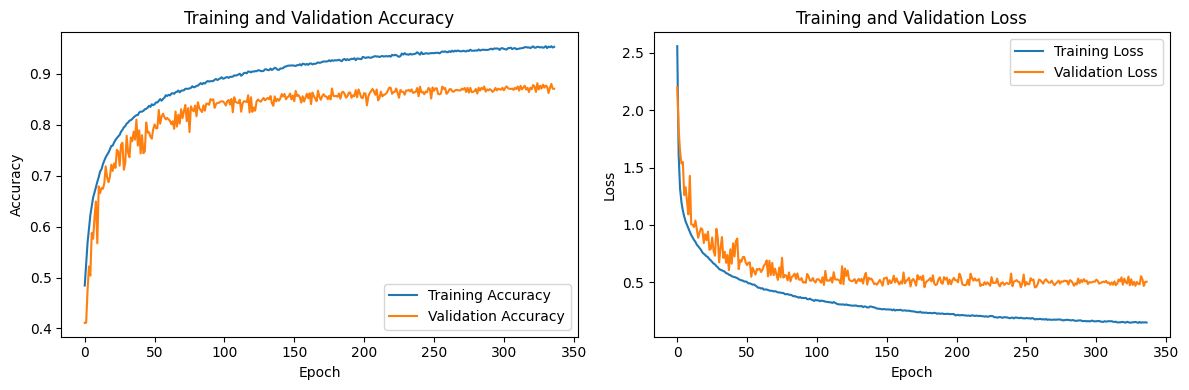

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
